# Libraries and Dataset overview

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Creating dataframe and viewing it

In [2]:
df = pd.read_csv("loan.csv", low_memory=False)

In [3]:
df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.shape

(39717, 111)

In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

***

# Cleaning the dataset

- ### Remove columns having null values

In [6]:
# Checking the percentage of null values in columns

nullColsPercent = ((df.isnull().sum())/len(df))*100

In [7]:
# There are columns which have 100percent null values so removing them

# Getting list of columns names which has only null values
nullColsList = nullColsPercent[nullColsPercent == 100]
nullColsList = nullColsList.index
nullColsList = list(nullColsList)

# Removing these columns
df = df.drop(nullColsList, axis=1)

In [8]:
df.shape

(39717, 57)

In [9]:
# Checking null values again

((df.isnull().sum())/len(df))*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


- ### Count Number of Unique values in each column

In [10]:
uniqueColsValues = df.nunique()
uniqueColsValues

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

There are several columns which are having single value in all the rows So they wont be of any use for the analysis.

In [11]:
# Getting list of columns names which has only single values
uniqueColsList = uniqueColsValues[uniqueColsValues == 1]
uniqueColsList = uniqueColsList.index
uniqueColsList = list(uniqueColsList)

#Removing those columns who have single values
df = df.drop(uniqueColsList, axis=1)

Checking the column ```pub_rec_bankruptcies```

In [12]:
df.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [13]:
# dropping the column 'pub_rec_bankruptcies' as it is having 90 percent values as single value.
df = df.drop(['pub_rec_bankruptcies'], axis=1)

In [14]:
df.shape

(39717, 47)

In [15]:
# Checking null values again

((df.isnull().sum())/len(df))*100

id                          0.000000
member_id                   0.000000
loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_title                   6.191303
emp_length                  2.706650
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
url                         0.000000
desc                       32.580507
purpose                     0.000000
title                       0.027696
zip_code                    0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
m

- ### Removing Irrelevant columns

In [16]:
# Some columns are irrelevant for our analysis

# Creating a list of irrelevant columns
unwantedColsList = ['id', 'member_id', 'emp_title', 'url', 'desc', 'title', 'zip_code']

# Removing these columns
df = df.drop(unwantedColsList, axis=1)

In [17]:
df.shape

(39717, 40)

In [18]:
# Checking null values again

((df.isnull().sum())/len(df))*100

loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_length                  2.706650
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
purpose                     0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
mths_since_last_delinq     64.662487
mths_since_last_record     92.985372
open_acc                    0.000000
pub_rec                     0.000000
revol_bal                   0.000000
revol_util                  0.125891
total_acc                   0.000000
o

- ### Removing Columns having large amount of missing data

In [19]:
# Three Columns or having more than 50% of data missing. So removing these columns from the data

missingDataCols = ['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']

df = df.drop(missingDataCols, axis=1)

In [20]:
df.shape

(39717, 37)

- ### Removing columns which are not available at the time of Loan application

In [21]:
behaviourCols = [
    'delinq_2yrs', 
    'earliest_cr_line', 
    'inq_last_6mths', 
    'open_acc', 
    'pub_rec', 
    'revol_bal', 
    'revol_util',
    'total_acc',
    'out_prncp',
    'out_prncp_inv',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_prncp',
    'total_rec_int',
    'total_rec_late_fee',
    'recoveries',
    'collection_recovery_fee',
    'last_pymnt_d',
    'last_pymnt_amnt',
    'last_credit_pull_d'
]

df = df.drop(behaviourCols, axis=1)

In [22]:
df.shape

(39717, 17)

- ### Checking and removing current loans

In [23]:
df = df[~(df.loan_status == 'Current')]

In [24]:
df.shape

(38577, 17)

In [25]:
# Checking null values again

((df.isnull().sum())/len(df))*100

loan_amnt              0.000000
funded_amnt            0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
addr_state             0.000000
dti                    0.000000
dtype: float64

- ### Treating Missing Values

The column ```emp_length``` has ```2.67%``` null values and is highly dependent column. Imputing null values may create a biased analysis. So removing these null value records from the dataset.

In [26]:
df = df[~(df.emp_length.isnull())]

In [27]:
df.shape

(37544, 17)

- ### Treating the special characters if any

Column ```int_rate``` has ```%``` symbol in it. So we need to get rid of it as it may affect our analysis.

In [28]:
df.int_rate = df.int_rate.apply(lambda x: float(x.split('%')[0]) if '%' in x else float(x))

# Checking for Outliers

There may be 2 columns where we could find outliers.
```annual_inc``` and ```loan_amnt```

In [29]:
#sns.boxplot(df[['annual_inc', 'loan_amnt']])

```loan_amnt``` doesn't have any outliers but ```annual_inc``` and has some outliers. So we need to check from what quantile range outliers are starting.

/Users/harishdambalkar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

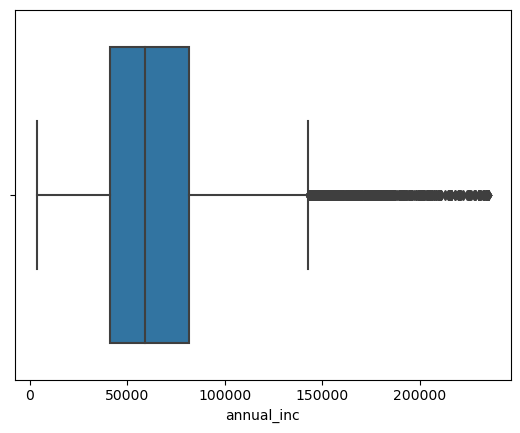

In [30]:
#Checking if outliers get removed if 99th percentile of data is considered.

data_99th_percent = df.annual_inc[df.annual_inc <= df.annual_inc.quantile(0.99)]
sns.boxplot(data_99th_percent)

Outliers got removed so we will consider only 99 percent of the dataset

In [31]:
# Uodating the dataset and Keeping only 99 percent of the datatset
#df = df[df.annual_inc <= df.annual_inc.quantile(0.99)]

In [32]:
df.shape

(37544, 17)

### So the data cleaning is completed

# Exploratory Data Analysis

### Dervied Metrics

Date in column ```issue_d``` is not in the standard format. so splitting this column in two and removing it

In [33]:
# Splitting the column 'issue_d' in two and removing it.

df[['issue_month', 'issue_year']] = df.issue_d.str.split('-', 1, expand=True)
df = df.drop(['issue_d'], axis=1)

Lets see how many people have defaulted the loans and how many people have fully paid their loans

<AxesSubplot:xlabel='loan_status', ylabel='count'>

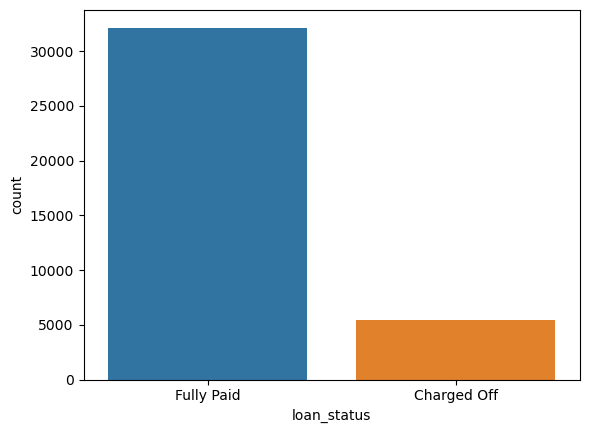

In [34]:
sns.countplot(data=df, x='loan_status')

### Chart showing the purpose of the loan for various categories

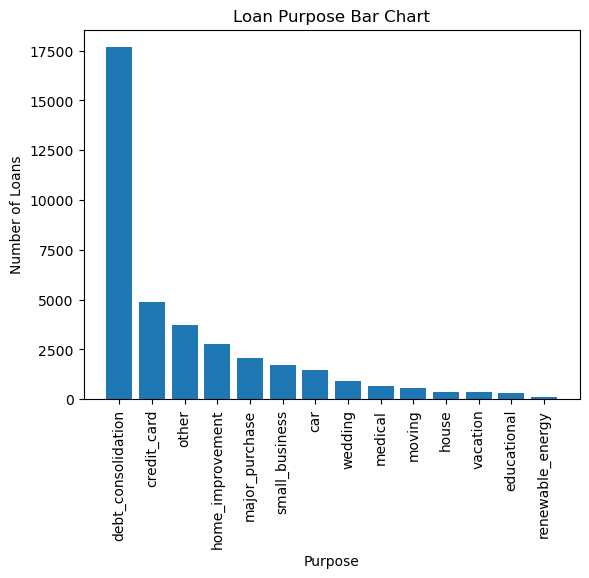

In [47]:
# Count the number of loans for each purpose
purpose_counts = df['purpose'].value_counts()

# Create a bar chart
plt.bar(purpose_counts.index, purpose_counts.values)

# Set the axis labels and title
plt.xlabel('Purpose')
plt.ylabel('Number of Loans')
plt.title('Loan Purpose Bar Chart')

# Rotate the x-axis tick labels by 90 degrees
plt.xticks(rotation=90)

# Show the plot
plt.show()

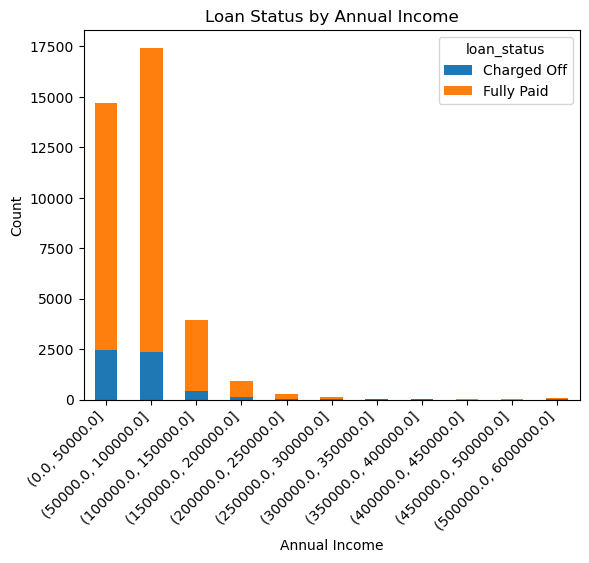

In [46]:

bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, df['annual_inc'].max()]

df['income_bin'] = pd.cut(df['annual_inc'], bins=bins)

# Create a crosstab of annual_income and loan_status
crosstab = pd.crosstab(df['income_bin'], df['loan_status'])

# Create a stacked bar chart
ax = crosstab.plot(kind='bar', stacked=True)

# Set the labels and title
ax.set_xlabel('Annual Income')
ax.set_ylabel('Count')
ax.set_title('Loan Status by Annual Income')

# Rotate the x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Show the plot
plt.show()

# Print the crosstab
#print(crosstab)

### Relationship between home ownership and loan status

#### We can see that, from the below graph the people owning houses are less likely to default the loan.


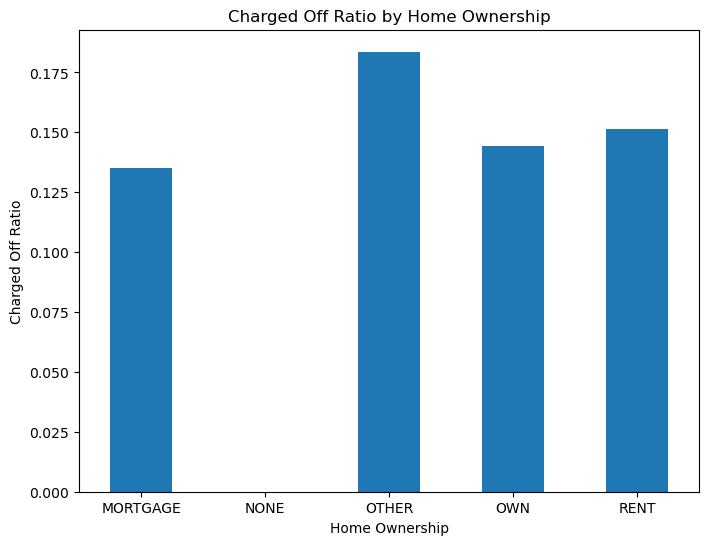

In [63]:
# Group the data by home ownership and loan status, and count the number of loans for each group
grouped = df.groupby(['home_ownership', 'loan_status']).size().unstack(fill_value=0)

# Calculate the ratio of charged off loans to total loans for each home ownership category
grouped['charged_off_ratio'] = grouped['Charged Off'] / (grouped['Charged Off'] + grouped['Fully Paid'])

# Plot the graph
ax = grouped['charged_off_ratio'].plot.bar(rot=0, figsize=(8, 6))
ax.set_title("Charged Off Ratio by Home Ownership")
ax.set_xlabel("Home Ownership")
ax.set_ylabel("Charged Off Ratio")
plt.show()



### Relationship between Interest rate and loan status

#### From the box plot we can understand that if the interest rate is higher, more number of people are defaulting the loan.

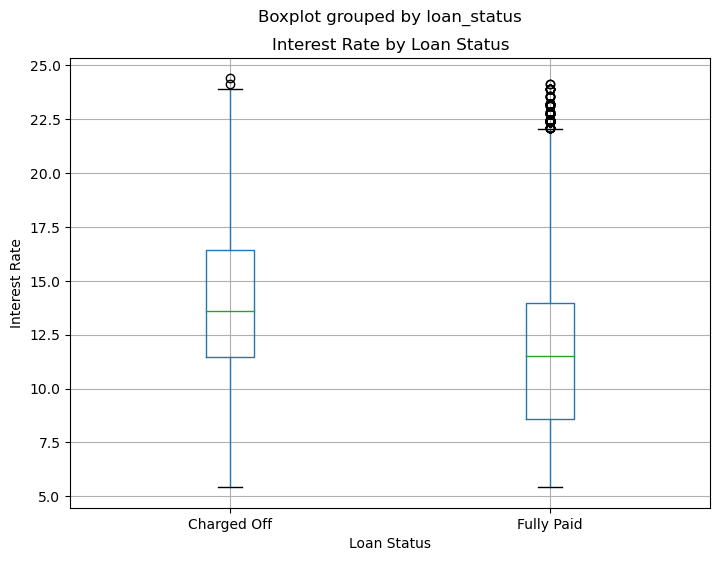

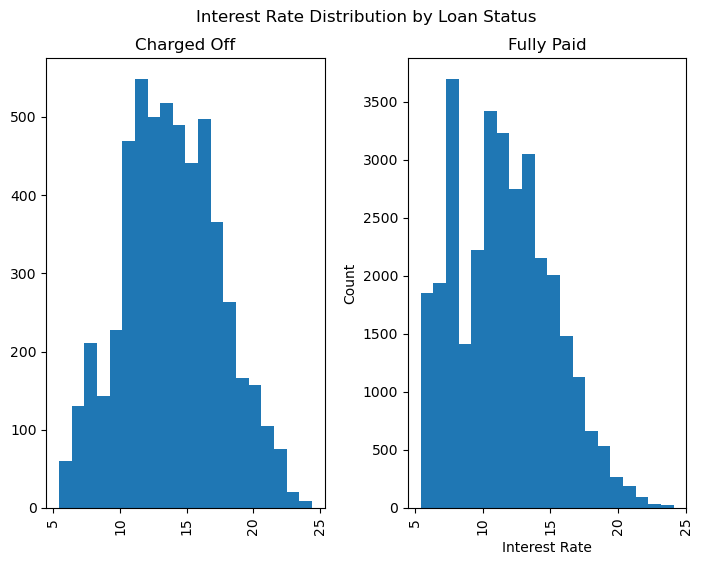

In [37]:
df.boxplot(column='int_rate', by='loan_status', figsize=(8, 6))

# Set the labels and title
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.title('Interest Rate by Loan Status')

# Show the plot
plt.show()

# Create a histogram of int_rate by loan_status
df.hist(column='int_rate', by='loan_status', bins=20, figsize=(8, 6))

# Set the labels and title
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.suptitle('Interest Rate Distribution by Loan Status')

# Show the plot
plt.show()



### Analysis based on the purpose of the loan

#### It is found that people who are taking loan for the purpose of debt consolidation are more likely to default the loan.
#### So it is better to reject such loan applications.

Charged Off Ratio by Purpose:
purpose
car                   0.107044
credit_card           0.104103
debt_consolidation    0.151570
educational           0.164038
home_improvement      0.118492
house                 0.166667
major_purchase        0.101442
medical               0.153963
moving                0.152174
other                 0.160517
renewable_energy      0.191489
small_business        0.270175
vacation              0.143678
wedding               0.100767
Name: charged_off_ratio, dtype: float64


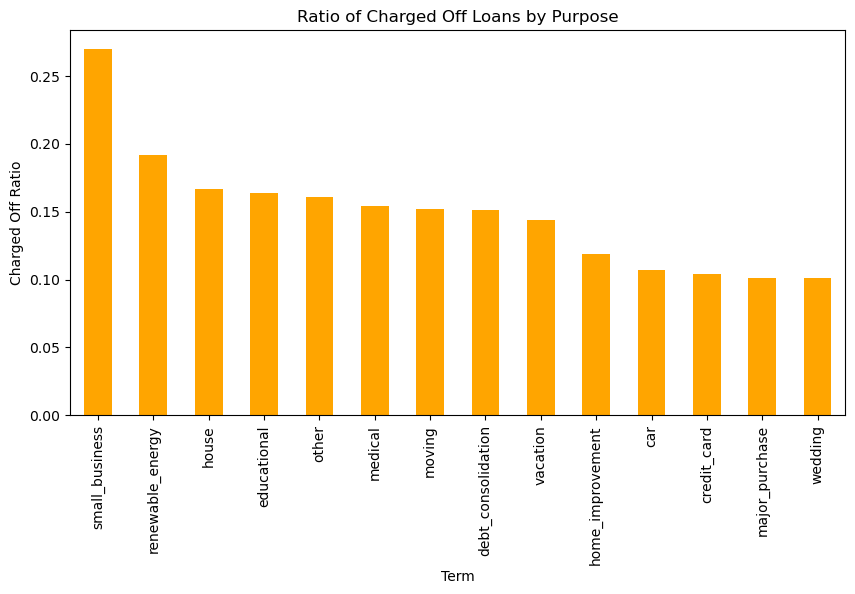

In [61]:
# Group the data by purpose and loan status, and count the number of loans for each group
grouped = df.groupby(['purpose', 'loan_status']).size().unstack(fill_value=0)

# Calculate the ratio of charged off loans to total loans for each purpose
grouped['charged_off_ratio'] = grouped['Charged Off'] / (grouped['Charged Off'] + grouped['Fully Paid'])

# Print the results
print("Charged Off Ratio by Purpose:")
print(grouped['charged_off_ratio'])


# Plot the charged off ratio for each loan purpose
grouped['charged_off_ratio'].sort_values(ascending=False).plot(kind='bar', figsize=(10,5), color='orange')

# Set the plot title and axis labels
plt.title('Ratio of Charged Off Loans by Purpose')
plt.xlabel('Term')
plt.ylabel('Charged Off Ratio')

# Show the plot
plt.show()


### Relationship between term and loan status.
#### From the below barchart we can see that if the term is 60 months, there is slightly less number of people who will default the loan than the ones with 36 months term.

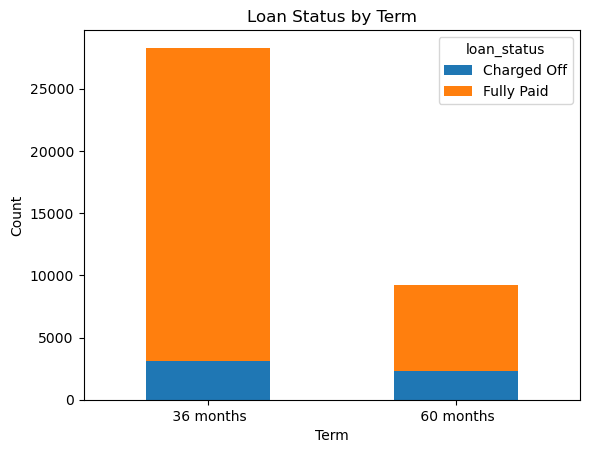

In [41]:
crosstab = pd.crosstab(df['term'], df['loan_status'])

# Create a stacked bar chart
ax = crosstab.plot(kind='bar', stacked=True)

# Set the labels and title
ax.set_xlabel('Term')
ax.set_ylabel('Count')
ax.set_title('Loan Status by Term')

# Rotate the x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Show the plot
plt.show()






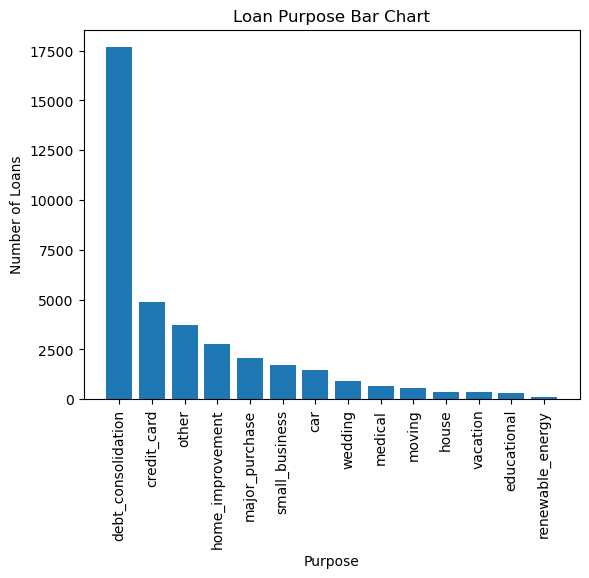

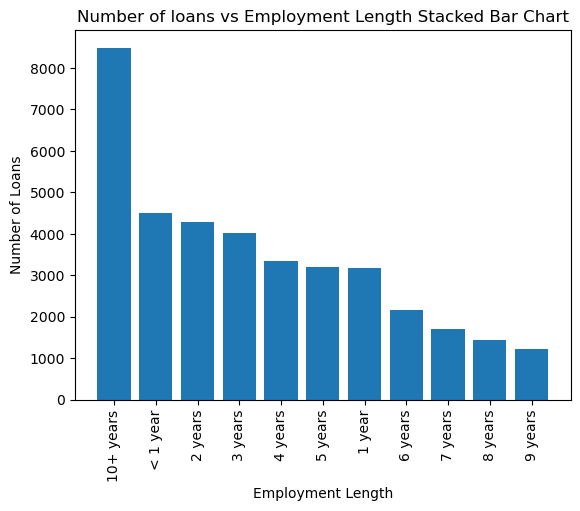

In [52]:
# Create a cross-tabulation table of loan status vs employment length
emp_length = df['emp_length'].value_counts()


# Create a bar chart
plt.bar(emp_length.index, emp_length.values)

# Set the axis labels and title
plt.xlabel('Employment Length')
plt.ylabel('Number of Loans')
plt.title('Number of loans vs Employment Length Stacked Bar Chart')

plt.xticks(rotation=90)

# Show the plot
plt.show()





purpose
car                   0.107044
credit_card           0.104103
debt_consolidation    0.151570
educational           0.164038
home_improvement      0.118492
house                 0.166667
major_purchase        0.101442
medical               0.153963
moving                0.152174
other                 0.160517
renewable_energy      0.191489
small_business        0.270175
vacation              0.143678
wedding               0.100767
Name: charged_off_ratio, dtype: float64


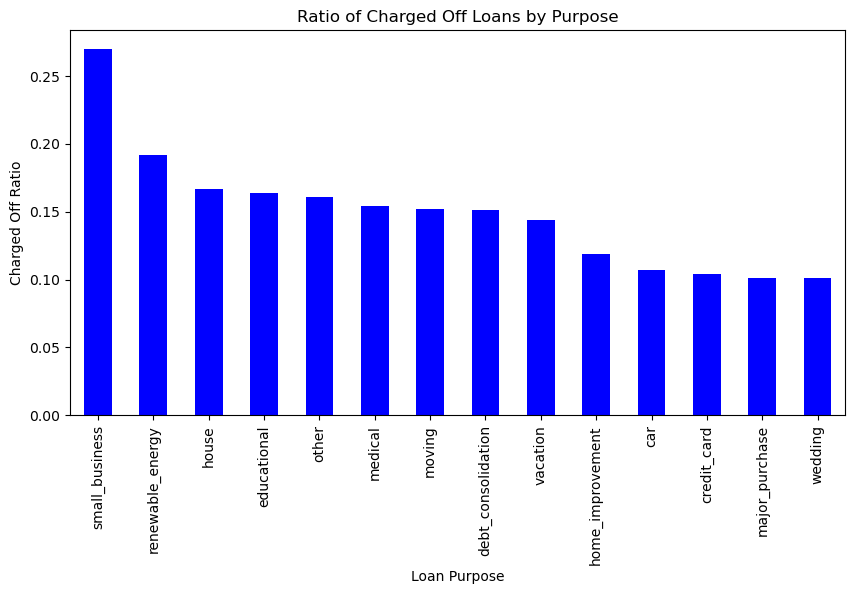

In [56]:
# Group the data by loan purpose and loan status, and count the number of loans for each group
grouped = df.groupby(['purpose', 'loan_status']).size().unstack(fill_value=0)

# Calculate the ratio of charged off loans to total loans for each loan purpose
grouped['charged_off_ratio'] = grouped['Charged Off'] / (grouped['Charged Off'] + grouped['Fully Paid'])

# Print the result
print(grouped['charged_off_ratio'])


# Plot the charged off ratio for each loan purpose
grouped['charged_off_ratio'].sort_values(ascending=False).plot(kind='bar', figsize=(10,5), color='blue')

# Set the plot title and axis labels
plt.title('Ratio of Charged Off Loans by Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Charged Off Ratio')

# Show the plot
plt.show()






Charged Off Ratio by Term:
term
 36 months    0.108636
 60 months    0.251269
Name: charged_off_ratio, dtype: float64


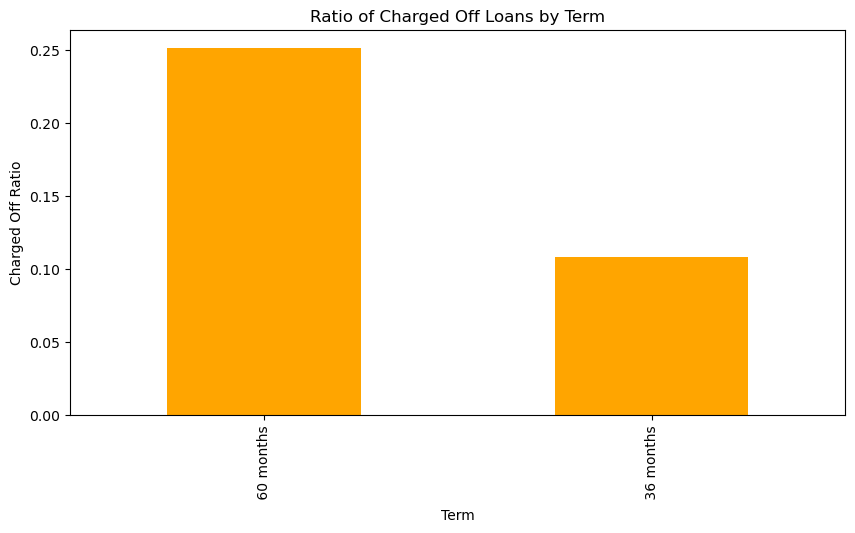

In [64]:
# Group the data by term and loan status, and count the number of loans for each group
grouped = df.groupby(['term', 'loan_status']).size().unstack(fill_value=0)

# Calculate the ratio of charged off loans to total loans for each term
grouped['charged_off_ratio'] = grouped['Charged Off'] / (grouped['Charged Off'] + grouped['Fully Paid'])

# Print the results
print("Charged Off Ratio by Term:")
print(grouped['charged_off_ratio'])


# Plot the charged off ratio for each loan purpose
grouped['charged_off_ratio'].sort_values(ascending=False).plot(kind='bar', figsize=(10,5), color='orange')

# Set the plot title and axis labels
plt.title('Ratio of Charged Off Loans by Term')
plt.xlabel('Term')
plt.ylabel('Charged Off Ratio')

# Show the plot
plt.show()
